<a href="https://colab.research.google.com/github/venegasfigueroahoneliaAlejandra/DERRUMBRE-DE-KM-34-VILLA-DE-LVAREZ-MINATITL-N/blob/main/%20Derrumbe%20carretera%20federal%2080.%20La%20Huerta-Barra%20de%20Navidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mapa interactivo guardado en: /content/drive/My Drive/mapa_interactivo.html


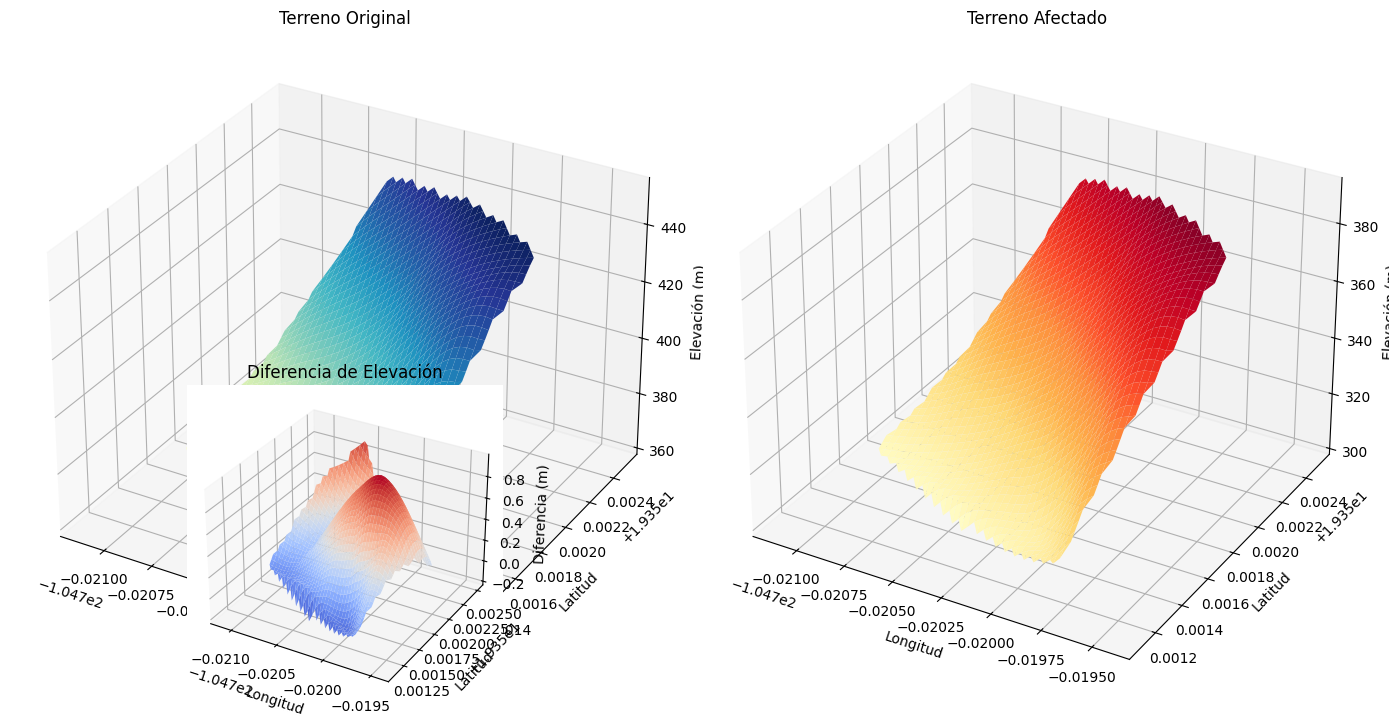

Volumen de tierra desplazada: 5417.06 metros cúbicos


In [ ]:
import numpy as np
import folium
from google.colab import drive
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Coordenadas y elevaciones de antes y despues del derrumbe
coordenadas_antes = [
    (19.35167, -104.72111, 332.67),
    (19.35222, -104.72083, 369.13),
    (19.3525, -104.72056, 410.46),
    (19.35222, -104.71999, 422.02),
    (19.35194, -104.71944, 422.36),
    (19.35167, -104.71973, 397.39),
    (19.35111, -104.71973, 346.34),
    (19.35139, -104.72000, 344.07),
    (19.35139, -104.72028, 337.45),
    (19.35167, -104.72083, 336.74),
    (19.35222, -104.72056, 386.05),
    (19.35194, -104.72028, 377.53),
    (19.35194, -104.71999, 400.56)
]

coordenadas_despues = [
    (19.35167, -104.72111, 332.67),
    (19.35222, -104.72083, 368.43),
    (19.3525, -104.72056, 409.48),
    (19.35222, -104.71999, 421.78),
    (19.35194, -104.71944, 422.15),
    (19.35167, -104.71973, 396.68),
    (19.35111, -104.71973, 346.34),
    (19.35139, -104.72000, 344.07),
    (19.35139, -104.72028, 337.45),
    (19.35167, -104.72083, 336.74),
    (19.35222, -104.72056, 385.64),
    (19.35194, -104.72028, 376.75),
    (19.35194, -104.71999, 399.60)
]

lat_antes = np.array([coord[0] for coord in coordenadas_antes])
lon_antes = np.array([coord[1] for coord in coordenadas_antes])
elev_antes = np.array([coord[2] for coord in coordenadas_antes])

lat_despues = np.array([coord[0] for coord in coordenadas_despues])
lon_despues = np.array([coord[1] for coord in coordenadas_despues])
elev_despues = np.array([coord[2] for coord in coordenadas_despues])

diferencia_elevacion = elev_antes - elev_despues

area_territorio = 14112.59
volumen_desplazado = np.sum(diferencia_elevacion) * area_territorio / len(diferencia_elevacion)

def create_interactive_map(lat, lon, lat_antes, lon_antes, elev_antes):

  mapa = folium.Map(location=[lat, lon], zoom_start=14)
  for i in range(len(lat_antes)):
        folium.CircleMarker(
            location=[lat_antes[i], lon_antes[i]],
            radius=3,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"Coordenada {i+1}<br>Latitud: {lat_antes[i]:.5f}<br>Longitud: {lon_antes[i]:.5f}<br>Elevación: {elev_antes[i]:.2f} m",
            tooltip=f"Coordenada {i+1}"
        ).add_to(mapa)
        return mapa

def plot_terrain_3d(lat_antes, lon_antes, elev_antes, lat_despues, lon_despues, elev_despues, diferencia_elevacion):
    fig = plt.figure(figsize=(14, 7))

    lon_grid_antes, lat_grid_antes = np.meshgrid(np.linspace(min(lon_antes), max(lon_antes), 50),
                                                 np.linspace(min(lat_antes), max(lat_antes), 50))
    lon_grid_despues, lat_grid_despues = np.meshgrid(np.linspace(min(lon_despues), max(lon_despues), 50),
                                                     np.linspace(min(lat_despues), max(lat_despues), 50))

    elev_antes_grid = griddata((lon_antes, lat_antes), elev_antes, (lon_grid_antes, lat_grid_antes), method='cubic')
    elev_despues_grid = griddata((lon_despues, lat_despues), elev_despues, (lon_grid_despues, lat_grid_despues), method='cubic')
    diferencia_grid = griddata((lon_antes, lat_antes), diferencia_elevacion, (lon_grid_antes, lat_grid_antes), method='cubic')

    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(lon_grid_antes, lat_grid_antes, elev_antes_grid + 30, cmap='YlGnBu', edgecolor='none')
    ax1.set_title('Terreno Original')
    ax1.set_xlabel('Longitud')
    ax1.set_ylabel('Latitud')
    ax1.set_zlabel('Elevación (m)')

    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(lon_grid_despues, lat_grid_despues, elev_despues_grid - 30, cmap='YlOrRd', edgecolor='none')
    ax2.set_title('Terreno Afectado')
    ax2.set_xlabel('Longitud')
    ax2.set_ylabel('Latitud')
    ax2.set_zlabel('Elevación (m)')

    ax3 = fig.add_subplot(223, projection='3d')
    ax3.plot_surface(lon_grid_antes, lat_grid_antes, diferencia_grid, cmap='coolwarm', edgecolor='none')
    ax3.set_title('Diferencia de Elevación')
    ax3.set_xlabel('Longitud')
    ax3.set_ylabel('Latitud')
    ax3.set_zlabel('Diferencia (m)')

    plt.tight_layout()
    plt.show()

drive.mount('/content/drive')
mapa = create_interactive_map(lat_antes.mean(), lon_antes.mean(), lat_antes, lon_antes, elev_antes)
output_path = '/content/drive/My Drive/mapa_interactivo.html'
mapa.save(output_path)
print(f"Mapa interactivo guardado en: {output_path}")

plot_terrain_3d(lat_antes, lon_antes, elev_antes, lat_despues, lon_despues, elev_despues, diferencia_elevacion)

print(f"Volumen de tierra desplazada: {volumen_desplazado:.2f} metros cúbicos")
